In [1]:
# Iris Species Classification using Decision Tree
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load and Explore the Dataset
print("=" * 50)
print("STEP 1: LOADING AND EXPLORING THE DATASET")
print("=" * 50)

STEP 1: LOADING AND EXPLORING THE DATASET


In [3]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [4]:
# Create a DataFrame for easier manipulation
df = X.copy()
df['species'] = y

In [6]:
# Map target values to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

print("\nClass distribution:")
print(df['species'].value_counts())

Dataset shape: (150, 5)

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-n

In [7]:
# Step 2: Data Preprocessing
print("\n" + "=" * 50)
print("STEP 2: DATA PREPROCESSING")
print("=" * 50)


STEP 2: DATA PREPROCESSING


In [8]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [9]:
# Since this is a clean dataset, we'll demonstrate handling missing values
# Let's artificially create some missing values for demonstration
np.random.seed(42)
missing_indices = np.random.choice(df.index, size=5, replace=False)
df_processed = df.copy()
df_processed.loc[missing_indices, 'sepal length (cm)'] = np.nan

print(f"\nCreated {df_processed['sepal length (cm)'].isnull().sum()} missing values for demonstration")


Created 5 missing values for demonstration


In [10]:
# Handle missing values by filling with mean
df_processed['sepal length (cm)'].fillna(df_processed['sepal length (cm)'].mean(), inplace=True)
print("Missing values after handling:", df_processed['sepal length (cm)'].isnull().sum())


Missing values after handling: 0


C:\Users\Emily\AppData\Local\Temp\ipykernel_33244\2670894040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['sepal length (cm)'].fillna(df_processed['sepal length (cm)'].mean(), inplace=True)


In [11]:
# Handle missing values by filling with mean
df_processed['sepal length (cm)'].fillna(df_processed['sepal length (cm)'].mean(), inplace=True)
print("Missing values after handling:", df_processed['sepal length (cm)'].isnull().sum())


Missing values after handling: 0


C:\Users\Emily\AppData\Local\Temp\ipykernel_33244\2670894040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['sepal length (cm)'].fillna(df_processed['sepal length (cm)'].mean(), inplace=True)


In [12]:
# Encode categorical labels (species)
print("\nLabel encoding for species:")
label_encoder = LabelEncoder()
df_processed['species_encoded'] = label_encoder.fit_transform(df_processed['species'])

print("Original species:", df_processed['species'].unique())
print("Encoded species:", df_processed['species_encoded'].unique())
print("Label mapping:")
for i, species in enumerate(label_encoder.classes_):
    print(f"  {i}: {species}")



Label encoding for species:
Original species: ['setosa' 'versicolor' 'virginica']
Encoded species: [0 1 2]
Label mapping:
  0: setosa
  1: versicolor
  2: virginica


In [13]:
# Prepare features and target
X_processed = df_processed[iris.feature_names]
y_processed = df_processed['species_encoded']

print(f"\nFinal processed dataset shape: {X_processed.shape}")



Final processed dataset shape: (150, 4)


In [14]:
# Step 3: Split the Data
print("\n" + "=" * 50)
print("STEP 3: DATA SPLITTING")
print("=" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_processed
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set class distribution:\n{pd.Series(y_train).value_counts().sort_index()}")
print(f"Test set class distribution:\n{pd.Series(y_test).value_counts().sort_index()}")


STEP 3: DATA SPLITTING
Training set size: 105 samples
Test set size: 45 samples
Training set class distribution:
species_encoded
0    35
1    35
2    35
Name: count, dtype: int64
Test set class distribution:
species_encoded
0    15
1    15
2    15
Name: count, dtype: int64


In [15]:
# Step 4: Train Decision Tree Classifier
print("\n" + "=" * 50)
print("STEP 4: TRAINING DECISION TREE CLASSIFIER")
print("=" * 50)

# Initialize and train the model
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=3  # Limiting depth to prevent overfitting
)

dt_classifier.fit(X_train, y_train)

print("Decision Tree classifier trained successfully!")
print(f"Model parameters: {dt_classifier.get_params()}")


STEP 4: TRAINING DECISION TREE CLASSIFIER
Decision Tree classifier trained successfully!
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [16]:
# Step 5: Make Predictions
print("\n" + "=" * 50)
print("STEP 5: MAKING PREDICTIONS")
print("=" * 50)

# Predict on test set
y_pred = dt_classifier.predict(X_test)

print("First 10 predictions:")
for i in range(10):
    true_label = label_encoder.inverse_transform([y_test.iloc[i]])[0]
    pred_label = label_encoder.inverse_transform([y_pred[i]])[0]
    print(f"Sample {i+1}: True = {true_label}, Predicted = {pred_label}")


STEP 5: MAKING PREDICTIONS
First 10 predictions:
Sample 1: True = virginica, Predicted = virginica
Sample 2: True = versicolor, Predicted = versicolor
Sample 3: True = virginica, Predicted = virginica
Sample 4: True = versicolor, Predicted = versicolor
Sample 5: True = virginica, Predicted = virginica
Sample 6: True = virginica, Predicted = virginica
Sample 7: True = versicolor, Predicted = versicolor
Sample 8: True = versicolor, Predicted = versicolor
Sample 9: True = setosa, Predicted = setosa
Sample 10: True = virginica, Predicted = virginica


In [17]:
# Step 6: Model Evaluation
print("\n" + "=" * 50)
print("STEP 6: MODEL EVALUATION")
print("=" * 50)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Calculate per-class precision and recall
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

print("\nPer-class metrics:")
for i, species in enumerate(label_encoder.classes_):
    print(f"{species}: Precision = {precision_per_class[i]:.4f}, Recall = {recall_per_class[i]:.4f}")


STEP 6: MODEL EVALUATION
Accuracy: 0.9778
Precision (weighted): 0.9792
Recall (weighted): 0.9778

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Per-class metrics:
setosa: Precision = 1.0000, Recall = 1.0000
versicolor: Precision = 1.0000, Recall = 0.9333
virginica: Precision = 0.9375, Recall = 1.0000



STEP 7: VISUALIZING RESULTS


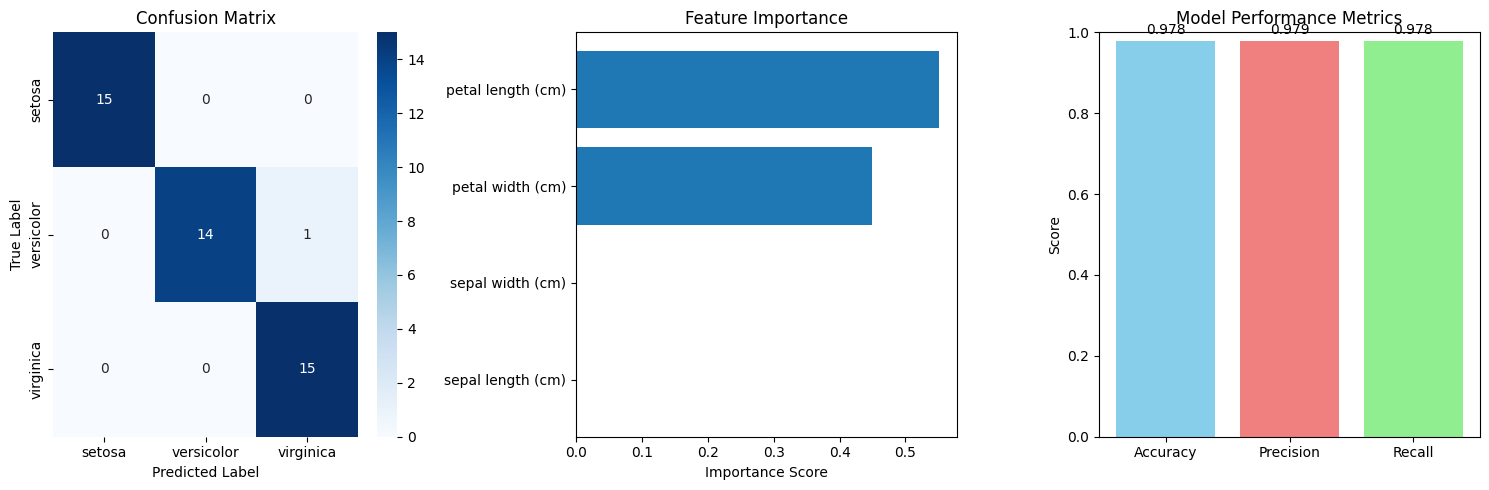

In [18]:
# Step 7: Visualize Results
print("\n" + "=" * 50)
print("STEP 7: VISUALIZING RESULTS")
print("=" * 50)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 5))

# Plot 1: Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot 2: Feature Importance
plt.subplot(1, 3, 2)
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Importance Score')

# Plot 3: Metrics Comparison
plt.subplot(1, 3, 3)
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]
colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.bar(metrics, scores, color=colors)
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')

for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [19]:
# Step 8: Additional Analysis
print("\n" + "=" * 50)
print("STEP 8: ADDITIONAL ANALYSIS")
print("=" * 50)

# Check for overfitting by comparing train and test performance
y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

if train_accuracy - accuracy > 0.1:
    print("Warning: Model might be overfitting (large gap between train and test accuracy)")
else:
    print("Model generalization appears good (similar train and test accuracy)")
    # Display tree depth and number of leaves
print(f"\nTree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")



STEP 8: ADDITIONAL ANALYSIS
Training Accuracy: 0.9810
Test Accuracy: 0.9778
Model generalization appears good (similar train and test accuracy)

Tree depth: 3
Number of leaves: 5


In [20]:
# Step 9: Make Predictions on New Data
print("\n" + "=" * 50)
print("STEP 9: PREDICTION ON NEW DATA")
print("=" * 50)

# Example: Predict on new sample data
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Likely setosa
    [6.7, 3.0, 5.2, 2.3],  # Likely virginica
    [5.9, 2.8, 4.1, 1.3]   # Likely versicolor
])

new_predictions = dt_classifier.predict(new_samples)
new_probabilities = dt_classifier.predict_proba(new_samples)

print("Predictions for new samples:")
for i, (sample, pred, prob) in enumerate(zip(new_samples, new_predictions, new_probabilities)):
    species_name = label_encoder.inverse_transform([pred])[0]
    print(f"\nSample {i+1}: {sample}")
    print(f"Predicted species: {species_name}")
    print(f"Prediction probabilities:")
    for j, class_name in enumerate(label_encoder.classes_):
        print(f"  {class_name}: {prob[j]:.4f}")

print("\n" + "=" * 50)
print("SUMMARY")
print("=" * 50)
print("✅ Data preprocessing completed (handled missing values, encoded labels)")
print("✅ Decision Tree model trained successfully")
print(f"✅ Model achieved {accuracy:.2%} accuracy on test set")
print("✅ Comprehensive evaluation metrics calculated")
print("✅ Visualizations created for better understanding")
print("✅ Model is ready for iris species classification!")



STEP 9: PREDICTION ON NEW DATA
Predictions for new samples:

Sample 1: [5.1 3.5 1.4 0.2]
Predicted species: setosa
Prediction probabilities:
  setosa: 1.0000
  versicolor: 0.0000
  virginica: 0.0000

Sample 2: [6.7 3.  5.2 2.3]
Predicted species: virginica
Prediction probabilities:
  setosa: 0.0000
  versicolor: 0.0294
  virginica: 0.9706

Sample 3: [5.9 2.8 4.1 1.3]
Predicted species: versicolor
Prediction probabilities:
  setosa: 0.0000
  versicolor: 1.0000
  virginica: 0.0000

SUMMARY
✅ Data preprocessing completed (handled missing values, encoded labels)
✅ Decision Tree model trained successfully
✅ Model achieved 97.78% accuracy on test set
✅ Comprehensive evaluation metrics calculated
✅ Visualizations created for better understanding
✅ Model is ready for iris species classification!


C:\Users\Emily\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Emily\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
